In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

In [2]:
a = "E:\\audio processing\\audio files\\sample-6s.mp3"
b = "E:\\audio processing\\audio files\\white-noise-8117.mp3"
c = "E:\\audio processing\\audio files\\news-time-intro-13620.mp3"


In [3]:
ipd.Audio(a)
ipd.Audio(b)
ipd.Audio(c)

In [4]:
audio1 , sr = librosa.load(a)
audio2 , sr = librosa.load(b)
audio3 , sr =librosa.load(c)

In [5]:
audio1

array([ 0.01353102, -0.01571935,  0.00032979, ..., -0.02741543,
       -0.03242036, -0.04139558], dtype=float32)

In [6]:
audio1.size


140928

In [7]:
sample_duration = 1 / sr

print(f"Duration of 1 sample is {sample_duration : .6f} seconds ")

Duration of 1 sample is  0.000045 seconds 


duration = sample_duration  * len(audio2)
print(duration)

In [8]:
duration = sample_duration * len(audio2) 
print(duration)





9.95265306122449


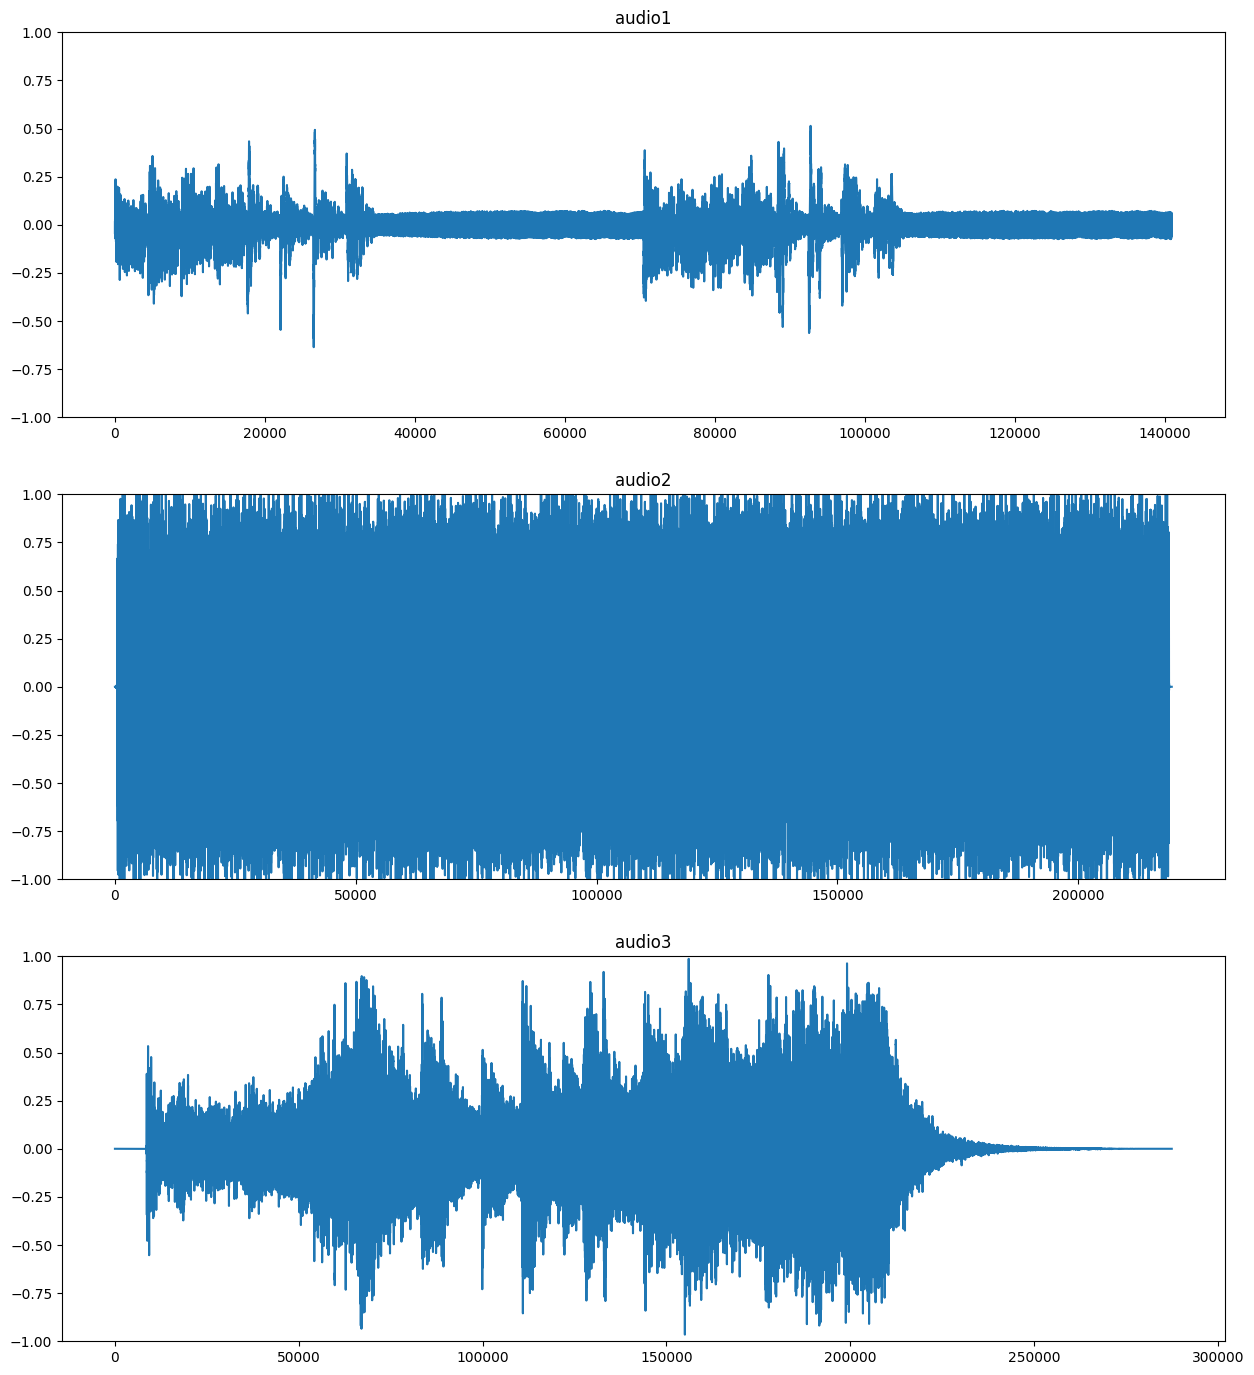

In [9]:
# visualize the wave form 

import matplotlib.pyplot as plt

# Assuming you have already loaded the audio data and sampling rate
# using librosa.load, as in your previous code snippet.

# Visualize the wave form
plt.figure(figsize=(15, 17))


plt.subplot(3, 1, 1)
plt.plot(audio1)
plt.title('audio1')
plt.ylim(-1,1)



plt.subplot(3, 1, 2)
plt.plot(audio2)
plt.title('audio2')
plt.ylim(-1,1)


plt.subplot(3, 1, 3)
plt.plot(audio3)
plt.title('audio3')
plt.ylim(-1,1)

plt.show()



In [43]:
FRAME_SIZE =1034
hop_length =512
import numpy as np

def amplitude_envelope(signal, frame_size , hop_length):
    amplitude_envelope = []

    # Calculate AE for each frame
    for i in range(0, len(signal), hop_length):
        current_frame_amplitude_envelope = max(signal[i : i+frame_size])
        amplitude_envelope.append(current_frame_amplitude_envelope)
        
        
    return np.array(amplitude_envelope)

        
        
        
        
#         frame = signal[i:i + frame_size]  # Extract the current frame
#         envelope_value = np.max(np.abs(frame))  # Calculate the amplitude envelope for the frame
#         amplitude_envelope.append(envelope_value)

#     return amplitude_envelope

# # Example usage:
# signal = [1, 2, 3, 4, 5, 4, 3, 2, 1]
# frame_size = 3
# result = amplitude_envelope(signal, frame_size)
# print(result)






In [44]:
ae_AUDIO2 =  amplitude_envelope(audio2 , FRAME_SIZE , hop_length)
len(ae_AUDIO2)

429

In [45]:
ae_AUDIO1 =  amplitude_envelope(audio1 , FRAME_SIZE , hop_length)
len(ae_AUDIO1)

276

In [46]:
ae_AUDIO3 =  amplitude_envelope(audio3 , FRAME_SIZE , hop_length)
len(ae_AUDIO3)

562

In [23]:
# in this 215 is the size of array so we can say thst we have total 215 frames o of frames 
# when we have hop - size than we have overlapping frame problem




AttributeError: module 'librosa.display' has no attribute 'waveplot'

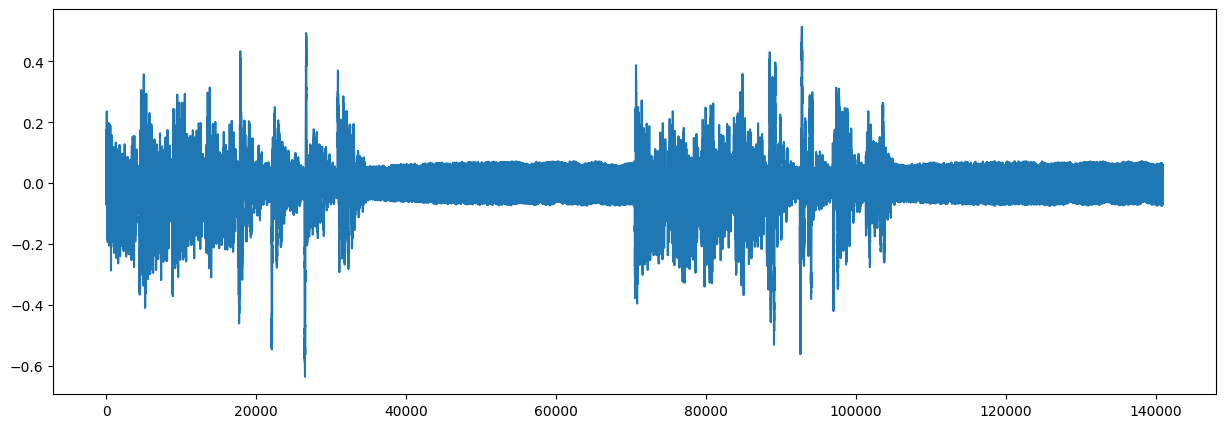

In [47]:
    # visualize the wave form 

import matplotlib.pyplot as plt

# Assuming you have already loaded the audio data and sampling rate
# using librosa.load, as in your previous code snippet.

# Visualize the wave form
# visualise amplitude envelope for all the audio files
frames = range(0 , ae_AUDIO1.size)
t = librosa.frames_to_time(frames , hop_length=hop_length)
plt.figure(figsize=(15, 17))


plt.subplot(3, 1, 1)
plt.plot(audio1)
librosa.display.waveplot(audio1 , alpha = 0.5)
plt.title('audio1')
plt.ylim(-1,1)
plt.plot(t , ae_AUDIO1 , color="r")



plt.subplot(3, 1, 2)
plt.plot(audio2)
librosa.display.waveplot(audio2 , alpha = 0.5)
plt.title('audio2')
plt.ylim(-1,1)
plt.plot(t , ae_AUDIO2 , color="r")


plt.subplot(3, 1, 3)
plt.plot(audio3)
plt.title('audio3')
librosa.display.waveplot(audio3 , alpha = 0.5)
plt.ylim(-1,1)
plt.plot(t , ae_AUDIO2 , color="r")

plt.show()



ValueError: x and y must have same first dimension, but have shapes (276,) and (429,)

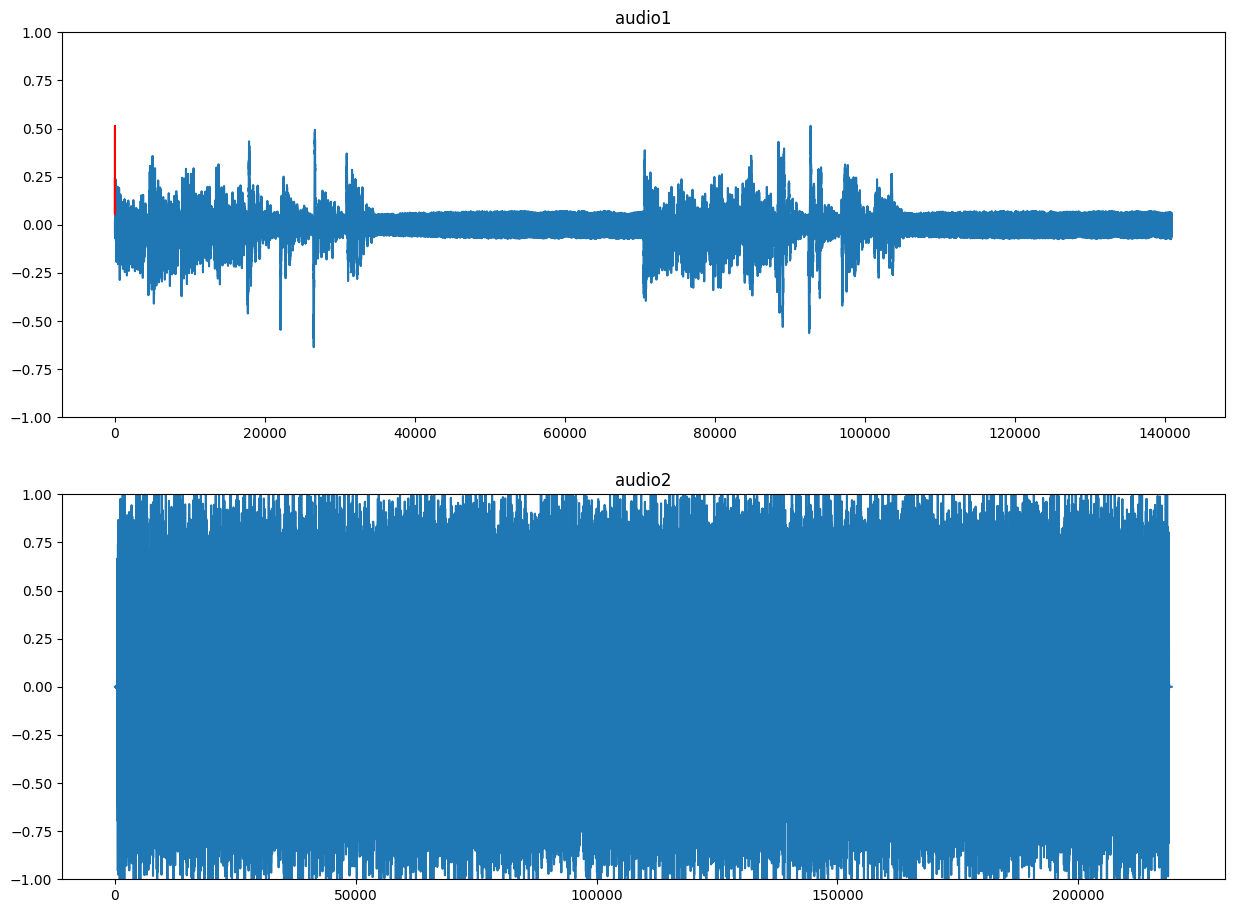

In [49]:
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Assuming you have already loaded the audio data and sampling rate
# using librosa.load, as in your previous code snippet.

# Visualize the waveforms and amplitude envelopes for all the audio files
frames = range(0, ae_AUDIO1.size)
t = librosa.frames_to_time(frames, hop_length=hop_length)

plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
plt.plot(audio1)
# librosa.display.waveplot(audio1, alpha=0.5)
plt.title('audio1')
plt.ylim(-1, 1)
plt.plot(t, ae_AUDIO1, color="r")

plt.subplot(3, 1, 2)
plt.plot(audio2)
# librosa.display.waveplot(audio2, alpha=0.5)
plt.title('audio2')
plt.ylim(-1, 1)
plt.plot(t, ae_AUDIO2, color="r")

plt.subplot(3, 1, 3)
plt.plot(audio3)
# librosa.display.waveplot(audio3, alpha=0.5)
plt.title('audio3')
plt.ylim(-1, 1)
plt.plot(t, ae_AUDIO3, color="r")

plt.show()


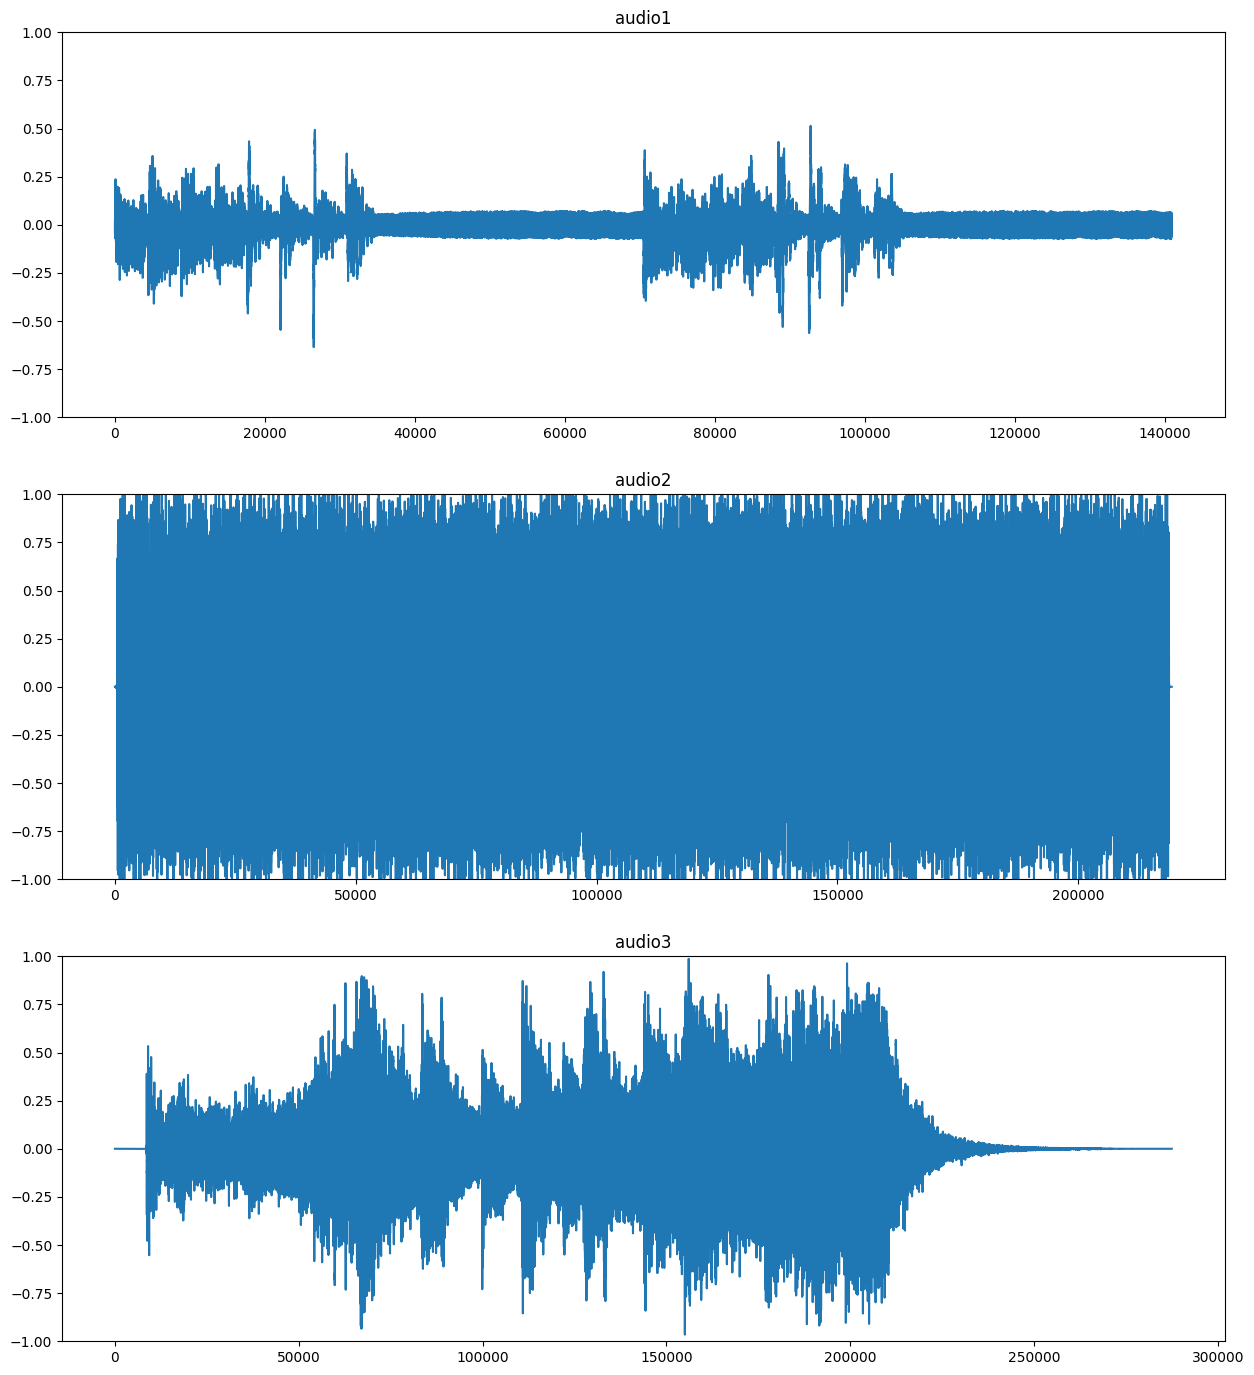

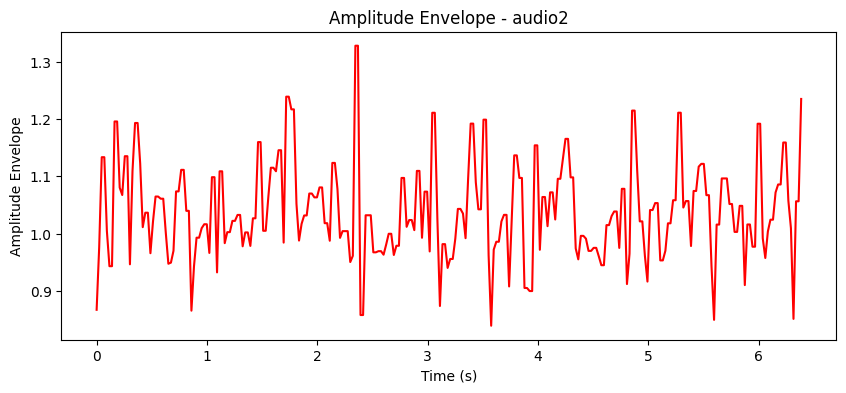

In [51]:
import matplotlib.pyplot as plt
import librosa

# Assuming you have already loaded the audio data and sampling rate
# using librosa.load, as in your previous code snippet.

# Visualize the waveforms and amplitude envelopes for all the audio files
frames = range(0, min(len(ae_AUDIO2), len(t)))

# Trim the longer array to the length of the shorter one
t_trimmed = t[:len(frames)]
ae_AUDIO2_trimmed = ae_AUDIO2[:len(frames)]

plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
plt.plot(audio1)
plt.fill_between(range(len(audio1)), audio1, alpha=0.5)
plt.title('audio1')
plt.ylim(-1, 1)

plt.subplot(3, 1, 2)
plt.plot(audio2)
plt.fill_between(range(len(audio2)), audio2, alpha=0.5)
plt.title('audio2')
plt.ylim(-1, 1)

plt.subplot(3, 1, 3)
plt.plot(audio3)
plt.fill_between(range(len(audio3)), audio3, alpha=0.5)
plt.title('audio3')
plt.ylim(-1, 1)

plt.show()

# Plot the amplitude envelope for audio2 using the trimmed t and ae_AUDIO2
plt.figure(figsize=(10, 4))
plt.plot(t_trimmed, ae_AUDIO2_trimmed, color="r")
plt.title('Amplitude Envelope - audio2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude Envelope')
plt.show()

